<a href="https://colab.research.google.com/github/leglessbeggar/Statistical-Consulting/blob/main/KModes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
!pip install kmodes
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt

In [4]:

from google.colab import files

uploaded = files.upload()
vedas = pd.read_csv("dimeter-mp copy.csv")

Saving dimeter-mp copy.csv to dimeter-mp copy.csv


In [6]:
vedag = vedas[vedas.Meter == 'G']
vedaa = vedas[vedas.Meter == 'A']

In [7]:
def meterstanza(veda):
    news = veda["Line"].str.split(pat = ".", expand = True)
    veda = pd.concat([news, veda], axis = 1)
    veda = veda.rename({0:"book", 1: "poem", 2:"stanza"}, axis = 'columns')
    veda["stanza"] = veda["stanza"].str[:-1]
    veda['meter'] = veda[['MP1',"MP2", "MP3", "MP4", "MP5", "MP6", "MP7", "MP8"]].agg("".join, axis = 1)
    veda['code'] = veda['meter'].astype("category").cat.codes
    veda = veda.iloc[:,np.r_[0:3, 4,-1]]
    stanza = veda.pivot_table(index  = ["book", "poem", "stanza"], columns = 'Pada', values = 'code').reset_index()
    return([veda, stanza])

In [10]:
linesg, stanzag = meterstanza(vedag)
linesa, stanzaa = meterstanza(vedaa)

In [12]:
stanzaa.head()

Pada,book,poem,stanza,a,b,c,d,e
0,1,010,01,29.0,38.0,9.0,46.0,NaN
1,1,010,02,9.0,60.0,91.0,38.0,NaN
2,1,010,04,63.0,162.0,80.0,60.0,NaN
3,1,010,05,60.0,70.0,37.0,71.0,NaN
4,1,010,06,127.0,8.0,134.0,48.0,NaN


In [13]:
linesg.head()

,book,poem,stanza,Pada,code
0,1,001,01,a,66
1,1,001,01,b,39
2,1,001,01,c,10
3,1,001,02,a,14
4,1,001,02,b,66


In [9]:
stanzag.head()

Pada,book,poem,stanza,a,b,c,d
0,1,001,01,66.0,39.0,10.0,NaN
1,1,001,02,14.0,66.0,116.0,NaN
2,1,001,03,79.0,78.0,172.0,NaN
3,1,001,04,10.0,79.0,120.0,NaN
4,1,001,05,10.0,10.0,10.0,NaN


In [ ]:
three = stanzag.iloc[:,3:6]
stanzag[three.isnull().any(axis = 1)]

Pada,book,poem,stanza,a,b,c,d
448,10,085,09,43.0,65.0,NaN,185.0
449,10,085,11,13.0,10.0,NaN,170.0
450,10,090,15,14.0,51.0,NaN,130.0
453,10,109,06,120.0,160.0,NaN,66.0
498,10,163,01,3.0,24.0,NaN,23.0
499,10,163,06,NaN,24.0,2.0,185.0


In [ ]:
stanzag.iloc[np.r_[448:451,453,498],5] = stanzag.iloc[np.r_[448:451,453,498],6]
stanzag.iloc[499,3:6] = list(stanzag.iloc[499,4:7])
stanzag[three.isnull().any(axis = 1)]

Pada,book,poem,stanza,a,b,c,d
448,10,085,09,43.0,65.0,185.0,185.0
449,10,085,11,13.0,10.0,170.0,170.0
450,10,090,15,14.0,51.0,130.0,130.0
453,10,109,06,120.0,160.0,66.0,66.0
498,10,163,01,3.0,24.0,23.0,23.0
499,10,163,06,24.0,2.0,185.0,185.0


In [ ]:
cost = []
K = range(1,20)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(stanzag.iloc[:,3:6])
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 6146.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 6146.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 6146.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 6146.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 6146.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 134, cost: 5811.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 98, cost: 5839.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...

Run 1, iteration: 1/100, moves: 555, cost: 4658.0
Run 1, iteration: 2/100, moves: 26, cost: 4658.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 514, cost: 4553.0
Run 2, iteration: 2/100, moves: 34, cost: 4553.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 472, cost: 4594.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 483, cost: 4820.0
Run 4, iteration: 2/100, moves: 8, cost: 4820.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 137, cost: 4799.0
Best run was number 2
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 549, cost: 4599.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 443, cost: 4643.0
Ru

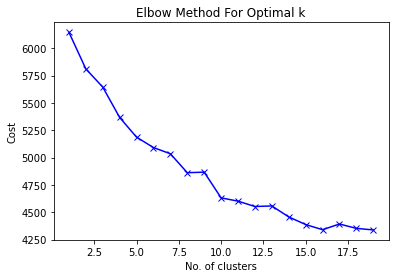

In [ ]:
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
kmode = KModes(n_clusters = 7, init = "random", n_init = 5, verbose = 1)
clusters = kmode.fit_predict(stanzag.iloc[:,3:6])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 450, cost: 5046.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 415, cost: 4987.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 215, cost: 5228.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 449, cost: 4957.0
Run 4, iteration: 2/100, moves: 120, cost: 4957.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 303, cost: 5083.0
Run 5, iteration: 2/100, moves: 32, cost: 5083.0
Best run was number 4


In [ ]:
stanzag.insert(0, "Cluster", clusters, True)
stanzag

Pada,Cluster,Cluster,book,poem,stanza,a,b,c,d
0,0,0,1,001,01,66.0,39.0,10.0,NaN
1,2,2,1,001,02,14.0,66.0,116.0,NaN
2,4,4,1,001,03,79.0,78.0,172.0,NaN
3,0,0,1,001,04,10.0,79.0,120.0,NaN
4,0,0,1,001,05,10.0,10.0,10.0,NaN
...,...,...,...,...,...,...,...,...,...
2241,0,0,9,067,26,120.0,10.0,10.0,NaN
2242,1,1,9,067,28,128.0,66.0,39.0,NaN
2243,3,3,9,067,29,196.0,145.0,145.0,NaN
2244,1,1,9,101,02,38.0,116.0,66.0,NaN


In [ ]:
labels = np.unique(clusters)